# Benji Wagner

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

1.

In [2]:
e = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])
v = np.array([[10, 2, 1],
             [-10, -5, -4],
             [16, 20, 13]])

In [3]:
A = np.linalg.solve(a=e, b=v)

In [4]:
# Check
np.matmul(e, A)

array([[ 10.,   2.,   1.],
       [-10.,  -5.,  -4.],
       [ 16.,  20.,  13.]])

2.

One way to find the rank of a matrix is to count the number of linearly independent rows, which we can do by finding the RREF of matrix A:

In [5]:
sp.Matrix(A).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

Since there are 3 linearly independent rows, the rank of A is 3.

A square matrix is full rank if and only if its determinant is nonzero. Thus, let's find A's determinant:

In [6]:
np.linalg.det(A)

161.99999999999977

Since A is a 3x3 matrix (square) and its determinant is nonzero, it is full-rank, i.e. its rank is 3.

In [7]:
# Check
np.linalg.matrix_rank(A)

3

3.

In [8]:
print("The eigenvalues are:\n", np.linalg.eig(A)[0], "\nand the eigenvectors are:\n", np.linalg.eig(A)[1])

The eigenvalues are:
 [9. 3. 6.] 
and the eigenvectors are:
 [[ 5.77350269e-01  6.31950024e-16 -1.20385853e-01]
 [-5.77350269e-01 -4.47213595e-01 -2.40771706e-01]
 [ 5.77350269e-01  8.94427191e-01  9.63086825e-01]]


4.

The matrix representation of f with respect to the eigenbasis is simply a diagonal matrix with the eigenvalues on the diagonal.

In [9]:
np.diag(np.linalg.eig(A)[0])

array([[9., 0., 0.],
       [0., 3., 0.],
       [0., 0., 6.]])

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

Note: Use `numpy.linalg.leastsq` function to solve this.

In [10]:
data = np.array([
       [  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])

In [11]:
a = np.repeat(1, 10).reshape((10,1))
b = np.reshape(data[:, 0], (10, 1))
c = np.reshape(data[:, 0]**2, (10,1))

In [12]:
# Design matrix X is 10 x 3
design = np.hstack((a, b, c))

In [13]:
y = np.reshape(data[:, 1], (10, 1))

In [14]:
solution = np.linalg.lstsq(design, y, rcond = None)[0]

In [15]:
solution

array([[ -0.35762896],
       [-11.78531232],
       [  2.53125199]])

The least squares quadratic solution is 
$$-0.35762896 - 11.78531232x + 2.53125199x^2$$

**3**. (20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.




In [16]:
A = np.matrix([[2, -1, 1], [-1, 2, -1], [1, -1, 1]])
b = np.matrix([[6], [2], [1]])

A symmetric matrix M is positive definite if the eigenvalues of M are positive.

In [17]:
# Check that A is symmetric:
np.all(A-A.T==0)

True

In [18]:
# Since we know A is symmetric, we will use numpy's eigh function instead of eig
np.linalg.eigh(A)[0]

array([0.26794919, 1.        , 3.73205081])

Since A is symmetric and has positive eigenvalues, A is positive definite.

Since A is a real symmetric matrix, A is also Hermitian. Thus, we can use Cholesky Decomposition to solve for x.

Cholesky Decomposition: **A = L L***
where **L y = b** and **L* x = y**

Since A consists of only real numbers, the conjugate transpose of L (L*) = the transpose of L (L^t)

In [19]:
L = np.linalg.cholesky(A)
y = np.linalg.solve(L, b)
x = np.linalg.solve(L.transpose(), y)

# Check:
solution = np.linalg.solve(A, b)

In [20]:
# Solution:
print("Solution using decomposition:\n", x, "\nSolution using numpy's solve function:\n", solution)

Solution using decomposition:
 [[ 5.]
 [ 3.]
 [-1.]] 
Solution using numpy's solve function:
 [[ 5.]
 [ 3.]
 [-1.]]


N.B. due to roundoff error, the two solutions are not exactly equal to each other.

In [21]:
np.equal(x, solution)

matrix([[False],
        [False],
        [False]])

However, if we check for equality within some degree of 'closeness' then they are equal

In [22]:
np.allclose(x, solution, rtol=1e-15)

True

**4**. (40 points)

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

- Plot the data together with the fitted polynomial. (10 points)



Using normal equations:

In [23]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
# Design Matrix
A = np.hstack([np.repeat(1,10).reshape(10, 1), np.reshape(x, (10, 1)), np.reshape(x**2, (10, 1))])

In [24]:
# x = (X^t * X)^-1 * X^t * y
x = np.linalg.solve(np.matmul(A.transpose(), A), np.matmul(A.transpose(), y))

In [25]:
x

array([ 2.55079998,  7.31478229, -2.04118936])

The fitted quadratic polynomial is $2.5508 + 7.3148x - 2.0412x^2$

Gradient Descent Optimization:

$$f(x) = \Sigma((a + bx + cx^2) - y)^2$$
$$\frac{\partial f}{\partial a} = 1$$
$$\frac{\partial f}{\partial b} = x$$
$$\frac{\partial f}{\partial c} = x^2$$


$$f = (y - X\beta)^T(y - X\beta)$$
$$f' = -2 X^T (y - X\beta)$$

In [26]:
betas = np.zeros(3)

In [27]:
def f(β_temp, X, y):
    return(y - X@β_temp)

In [28]:
def fprime(β_temp, X, y):
    return(-2 * X.T @ (y - X @ β_temp))

In [29]:
def next_x(β, X, y, α = 0.00005, runs = 100000):
    for i in range(runs):
        β = β - α * fprime(β, X, y)
    return(β)

In [30]:
β = next_x(β = betas, X = A, y = y)

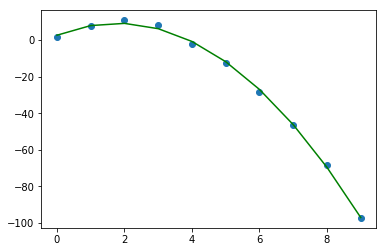

In [31]:
plt.scatter(x = np.arange(10), y = y)
plt.plot(np.arange(10), A @ β, 'g-')
plt.show()